In [17]:
import pandas as pd
import numpy  as np
import matplotlib as plt
import seaborn as sns
import numpy as np


In [18]:
df = pd.read_csv('./datasets/teste_08_06.csv', sep=',')
df1 = df[['compute_version','registers','smem','cmem','num_of_cores','L2','bandwith','theoretical_flops','AppId','occupancy','input_size','duration','block_x']]

In [19]:
sns.set_palette("Accent")
sns.set_style("darkgrid")


<AxesSubplot:title={'center':'Duração'}, xlabel='Segundos'>

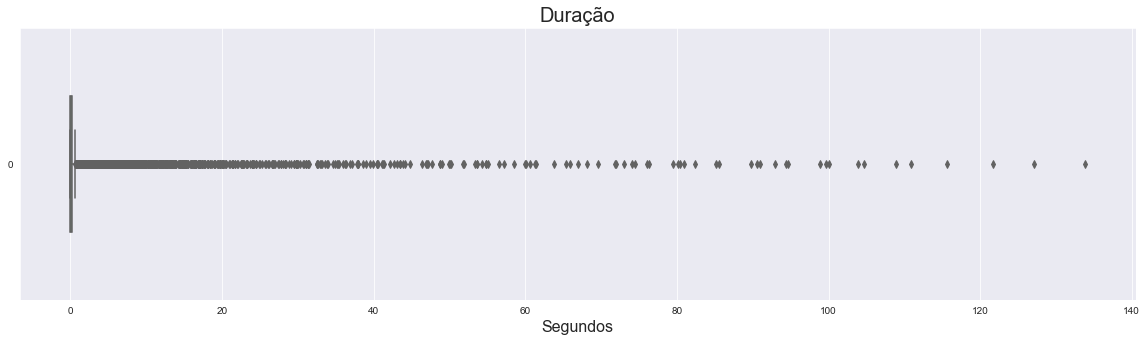

In [20]:
ax = sns.boxplot(data=df1['duration'], orient='h', width=0.5)
ax.figure.set_size_inches(20,5)
ax.set_title('Duração', fontsize=20)
ax.set_xlabel('Segundos', fontsize=16)
ax

c:\Users\luanr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequência')

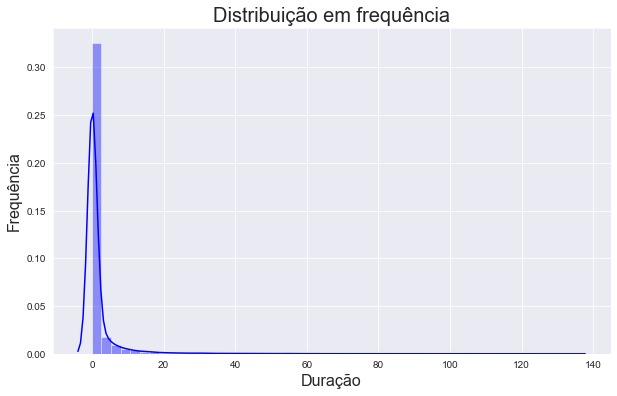

In [25]:
ax = sns.distplot(df1['duration'], color='blue')
ax.figure.set_size_inches(10,6)
ax.set_title('Distribuição em frequência', fontsize=20)
ax.set_xlabel('Duração', fontsize=16)
ax.set_ylabel('Frequência', fontsize=16)

In [83]:
#ax = sns.pairplot(df1, y_vars='duration', x_vars=['compute_version','registers','smem','cmem','num_of_cores','L2','bandwith','theoretical_flops','AppId','number_of_lines_kernel','occupancy','input_size','duration','block_x'], kind='reg', height=5)
#ax.fig.suptitle('Dispersão entre as variáveis', fontsize=20, y=1.05)
#ax

In [26]:
#df1 = df.sort_values(by='AppId', ascending=True)
#df1['duration'] = pd.to_numeric(df1['duration'])
df1 = df1.select_dtypes(exclude=['object'])
#df1 = df1.drop(columns= ["Unnamed: 0"], axis = 1)

#df1 = df1.sort_values(by='AppId', ascending=True)
#df1['AppId'] = pd.to_numeric(df1['AppId'])
#df1 = df1.select_dtypes(exclude=['object'])
df1=df1.dropna()

In [27]:
df1.describe().round(2)

,compute_version,registers,smem,cmem,num_of_cores,L2,bandwith,theoretical_flops,AppId,occupancy,input_size,duration,block_x
count,8459.00,8459.00,8459.00,8459.00,8459.00,8459.00,8459.00,8459.00,8459.00,8459.00,8.459000e+03,8459.00,8459.00
mean,4.09,18.16,2062.23,347.74,2348.85,1.55,245.47,4339.62,5.42,84.79,5.573130e+07,1.94,189.92
std,0.89,10.27,4331.58,0.99,518.55,0.72,50.32,1060.40,2.47,26.32,8.270507e+07,7.92,328.45
min,3.00,8.00,0.00,344.00,1536.00,0.50,192.26,3250.18,1.00,13.00,2.560000e+02,0.00,8.00
25%,3.50,8.00,0.00,348.00,2048.00,1.00,208.00,3552.77,3.00,50.00,3.840000e+03,0.00,16.00
50%,3.50,13.00,0.00,348.00,2496.00,1.50,224.32,4291.20,6.00,100.00,7.424000e+03,0.02,32.00
75%,5.20,31.00,1024.00,348.00,2880.00,2.00,288.38,4980.74,8.00,100.00,1.048576e+08,0.27,256.00
max,5.20,32.00,16392.00,348.00,3072.00,3.00,336.48,6610.94,9.00,100.00,2.684355e+08,133.83,1024.00


In [29]:

df1['log_compute_version'] = np.log(df1['compute_version'])
df1['log_registers']= np.log(df1['registers'])
df1['log_smem']= np.log(df1['smem'] + 1)
df1['log_cmem']= np.log(df1['cmem'])
df1['log_num_of_cores']= np.log(df1['num_of_cores'])
df1['log_l2']= np.log(df1['L2'] + 1)
df1['log_bandwith']= np.log(df1['bandwith'])
#df1['log_number_of_lines_kernel']= np.log(df1['number_of_lines_kernel'])
df1['log_occupancy']= np.log(df1['occupancy'])
df1['log_input_size']= np.log(df1['input_size'])
df1['log_duration']= np.log(df1['duration'])
df1['log_block_x']= np.log(df1['block_x'])
df1['AppId'] = df1['AppId']

In [33]:
df2 = df1[['log_compute_version','log_registers', 'log_smem', 'log_cmem', 'log_num_of_cores', 'log_l2', 'log_bandwith', 'log_occupancy', 'log_input_size', 'log_duration', 'log_block_x', 'AppId']]


c:\Users\luanr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição em frequência'}, xlabel='Duração', ylabel='Density'>

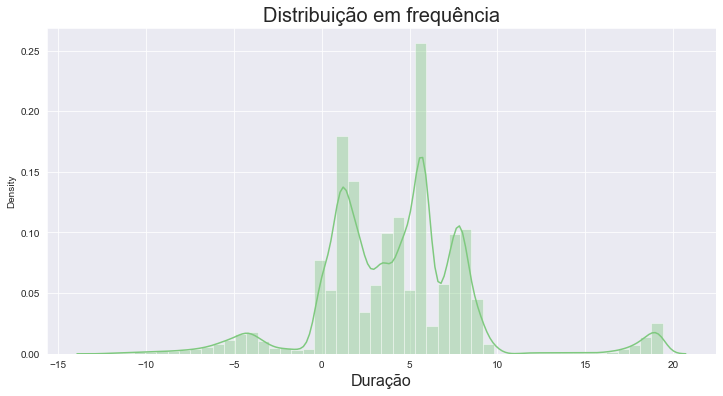

In [35]:
ax = sns.distplot(df2)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição em frequência', fontsize=20)
ax.set_xlabel('Duração', fontsize=16)
ax

In [52]:
def calculate_mape(actual, predicted) -> float:
  
  # Convert actual and predicted
  # to numpy array data type if not already
  if not all([isinstance(actual, np.ndarray), isinstance(predicted, np.ndarray)]):
    actual, predicted = np.array(actual), np.array(predicted)

  # Calculate the MAPE value and return
  return round(np.mean(np.abs((
    actual - predicted) / actual)) * 100, 2)

In [56]:
from sklearn.metrics import mean_absolute_percentage_error

actual = [,1000,10]
prediction = [10,1000,10]
mape = mean_absolute_percentage_error(actual, prediction)
print(mape, "%")

0.0 %


In [8]:
from sklearn import metrics

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [38]:
for idApp in range(1,2):
    idApp = float(idApp)
    X_train = df2[df2['AppId'] != idApp]
    Y_train = df2[df2['AppId'] != idApp]['log_duration']
    X_test = df2[df2['AppId'] == idApp]
    Y_test = df2[df2['AppId'] == idApp]['log_duration']


    #xTrain = np.log(X_train + 0.01)
    #xTest = np.log(X_test + 0.01)
    yTrain = np.log(Y_train + 0.01)
    yTest = np.log(Y_test + 0.01)
    #train_test_split(X_train, Y_train, test_size=0.3, random_state=2811)
    
    modelo = LinearRegression()
    modelo.fit(X_train, yTrain)
    
    y_pred = modelo.predict(X_test)
    
    print('Application: ', idApp, ' Percentage:', mean_absolute_percentage_error(yTest, y_pred))

c:\Users\luanr\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: Input y contains NaN.